# Laboratorio 03: Raíces.

---
### Profesor: Daniel Ruiz Mejía
### Nombre:Benjamin Escobar Jaramillo CC 1001228411
*Métodos computacionales 2025-I*

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import bisect, newton
import math

# 1

La ecuación de Kepler juega un papel importante en la mecánica celeste, ya que permite el calculo de la posición angular de objetos orbitantes. Para todas las órbitas elipticas, la ecuación

$$M = E- e\sin(E)$$

siendo $M$ la anomalía media, $E$ la anomalía excéntrica y $e$ la excentricidad ($e= \sqrt{1-b/a}$) (con $a>b$ los semiejes). Los astrónomos definen las "anomalías"  como posiciones angulares: la anomalía media $M$ es la posición angular del objeto en una órbita circular ficticia y, suponiendo una velocidad angular constante, puede relacionarse con el lapso de tiempo transcurrido desde el paso por el perihelio

$$M= \frac{2\pi}{T} (t-t_0)$$

donde $T$ es el periodo orbital y $t_0$ el tiempo cuando el objeto está en el perihelio.

Para el cometa Halley $e=0.9672671$, $T=75.96000$ años y $t_0=1986.1113$ años (Febrero 9 de 1986).

* Encuentre $E$ para el cometa Halley el 1 de abril de 1986. Para esto, haga una gráfica de

$$f(E) = E - e\sin(E) - M$$

para $E\in [0,1]$.

* Grafique $E=E(t)$ para todo un periodo de revolución y resuelva usando el método de Newton y secante

$$E-e\sin(E) - M(t) = 0$$

con un paso de $\Delta t = T/100$. $t_i = t_0 + (i)*\Delta t$, comenzando en $E(t_0) = 0$

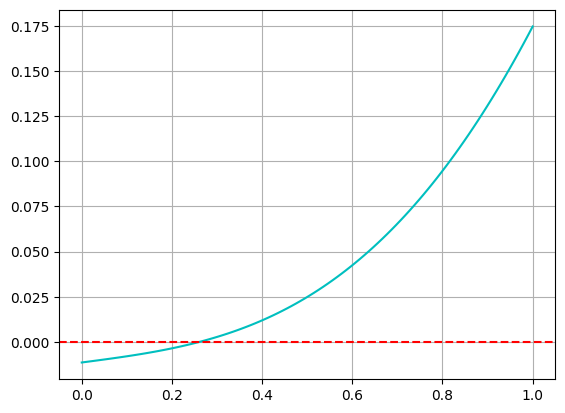

In [67]:
#Algo confuso, huh? Definamos elementos
e=0.9672671
T=75.96000
t0=1986.1113   #(Febrero 9)
t=1986.2493    #(Abril 1) (calculado manualmente)

M=((2*np.pi)/T)*(t-t0)  #Ecuación...

def f(E):    #Función de anomalias excentricas
  return E-(e*np.sin(E))-M

ejeE=np.linspace(0,1,100)
ejeY=[]
for i in ejeE:
  ejeY.append(f(i))

plt.plot(ejeE,ejeY,color="c")
plt.grid()
plt.axhline(y=0,linestyle="--",color="r")

Text(0.5, 0, '$t$')

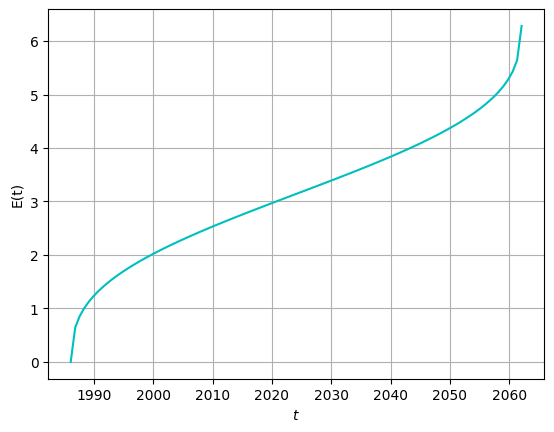

In [74]:
#Realicemos entonces la grafica pra un periodo de revolución!

e=0.9672671
T=75.96000      #mismos parametros
t0=1986.1113


puntos=100
deltat=T/puntos  #Definimos el paso
t=np.array([t0+i*deltat for i in range(puntos+1)])      #Definicion dada (mas uno, para que coja hasta el ultimo!)
#Perfecto! Ya tenemos nuestro eje x (t), ahora hagamos la E(t)
y=[]  #Ahi meteremos el E(t)
y.append(0)
for i in range(1,puntos+1):

  M=((2*np.pi)/T)*(t[i]-t0)       #Actualizamos el t en cada iteración
  def f_0(E):
    return E-(e*np.sin(E))-M #Definimos con el t actualizado

  y.append(newton(f_0,x0=1)) #Hallamos el numero con newton! (y con secante, basta con añadirle otro punto.)


plt.plot(t,y,color="c")
plt.grid()
plt.ylabel("E(t)")
plt.xlabel("$t$")


# 2
En la teoria de campo medio, la magnetización como función de la temperatura de un material magnético puede ser calculada como:

$$
m(T) = \tanh\left( \frac{m(T)}{T} \right)
$$

donde $m$ y $T$ son la magnetizacion y temperatura reducida respectivamente


Para $T = 0.5$, determine:

- La magnetización reducida empleando el metodo de la secante y Newton-Raphson (Muestre su resultado con 4 cifras).

- Valide su respuestado con el metodo de punto fijo (Muestre su resultado con 4 cifras).

Ahora, defina `T = np.linspace(0.1,0.99,100)`, y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.

In [5]:
#Como podemos observar, tenemos una suerte de ecuación trascendental, asi que empleemos raices para resolverla!

def magnetización(mt,T):     #Definimos la función perse.
  mt=np.tanh(mt/T)
  return mt

def magneraiz(mt):            #Y esta función... hallará la raiz! (un f(x)=0)
  return mt-np.tanh(mt/0.5)

Valor=newton(magneraiz,x0=1); #Empleamos Newton (sin derivada, por practicidad)
print(round(Valor,4))
print(round(magnetización(Valor,0.5),4))  #Confirmamos que asi sea, con nuestra función orignal

0.9575
0.9575


In [6]:
Valor_sec=newton(magneraiz,x0=1,x1=2)  #Usamos secante (2 ountos)
print(round(Valor_sec,4))

0.9575


In [7]:
#De igual manera, empleamos ahora punto fijo!, para confirmar
def puntofijo(g,a,tol,maxiter):
  '''Calcula la raiz, empleando el metodo de punto fijo, recibe:
  g: La funcion g(x), debe ser de la forma x=g(x)
  a: Un punto (cerca de la raiz)
  tol: Tolerancia de precisión
  maxiter: Máximas iteraciones

  '''
  x0=a
  for i in range(maxiter):
    x1=g(x0)
    if abs(x1-x0)<tol:
      return x0
    x0=x1
  return print("maximas iteraciones alcanzadas")

#Debemos tener nuestra función de la forma g(x)=x!, si mt es nuestro x... Ya esta lista la funcion!
#Por lo cual solo queda evalar
def gx(mt):     #Definimos la función perse.
  mt=np.tanh(mt/0.5)
  return mt

valor_puntofijo=puntofijo(gx,1,1e-18,100) #Pongamosle una tolerancia bien precisa!
print(round(valor_puntofijo,4)) #Y voilà!

0.9575


In [8]:
#Observe entonces nuestras buenas aproximaciones
print(round(Valor,4))
print(round(Valor_sec,4))
print(round(magnetización(Valor,0.5),4))
print(round(valor_puntofijo,4))

0.9575
0.9575
0.9575
0.9575


In [9]:
x = np.linspace(0.1,0.99,100) #Nuestro linspace
y=[]                          #Acá guardamos las ecuaciones


for i in x:        #y aca, movemos las T en todo el linspace solicitado
  T=i
  def magneraiz2(mt):    # De modo que la función cambie de variable T en cada momento
    return mt-np.tanh(mt/T)
  y.append(newton(magneraiz2,x0=1,x1=0.5))     #Y lo guardamos en nuestro eje Y! (Newton con dos puntos, es es secante)

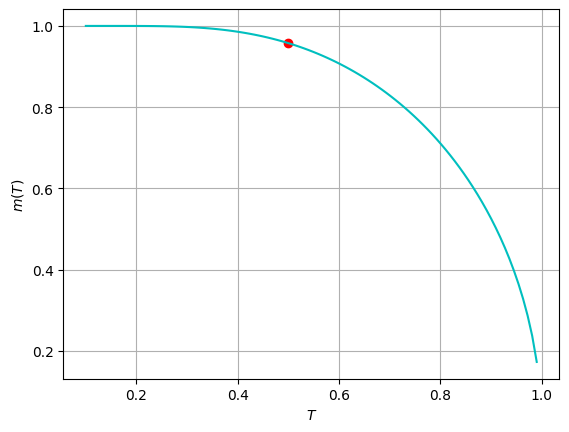

In [10]:
plt.plot(x,y,color="c")
plt.grid()
plt.xlabel("$T$")
plt.ylabel("$m(T)$")
plt.scatter(0.5,Valor,color="r") #Este punto es solo para confirmar todo lo mencionado junto con nuestro primer calculo

# 3

La energía libre de Gibbs para 1 mol de hidrógeno a una temperatura $T$ está dada por:

$$G = -RT \ln \left[ \left( \frac{T}{T_0} \right)^{5/2} \right]$$

donde:  
- $ R = 8.314 \, \text{J/K} $ es la constante de los gases.  
- $ T_0 = 4.444 \, \text{J/K} $ es una constante de referencia.  

Determinar la temperatura $ T $ a la cual $ G = -10^5 \, \text{J}$.  



In [11]:
def gibbs(T):
  R=8.314                               #Hacemos la función de gibbs (Para confirmar al final)
  T0=4.444
  total=(-R)*T*np.log((T/T0)**(5/2))
  return total

def gibbs_0(T):                      # Ahora, para emplear nuestros metodos, hacemos el clasico f(x)=0
  valor=gibbs(T)+(10**5)
  return valor


Temperatura = newton(gibbs_0,x0=1,x1=8)             #Usamos el metodo de la secante (Para no derivar! jiji)
print(f"La temperatura es {Temperatura} K")
print(gibbs(Temperatura))                                #Y confirmamos, exitosamente

La temperatura es 904.9743413388665 K
-100000.0


# 4

La distribución de intensidad en la difracción de Fraunhofer por una rendija de ancho $W$ y altura infinita, iluminada con luz monocromática de longitud de onda $\lambda$, está dada por:

$$I(\theta) = I_0 \left[ \frac{\sin(\pi W \sin \theta / \lambda)}{\pi W \sin \theta / \lambda} \right]^2,$$

donde $\theta$ es el ángulo de observación respecto a la dirección incidente. Introduciendo la variable adimensional:

$$x = \pi W \sin \theta / \lambda,$$

la intensidad y su derivada se expresan como:

$$I(x) = I_0 \left( \frac{\sin x}{x} \right)^2, \quad I(0) = I_0,$$
$$I'(x) = \frac{2I_0}{x} \left( \cos x - \frac{\sin x}{x} \right) \frac{\sin x}{x}, \quad I'(0) = 0.$$

- Graficar $I(x)$ y $I'(x)$ en el intervalo $x \in [-10, 10]$.

- Calcular el valor $x_{1/2}$ (positivo) donde $I(x) = I_0/2$, resolviendo la ecuación $I(x) - I_0/2 = 0$ con el método de la secante y aproximación inicial $x_0 = \pi$.

- Encontrar los máximos locales $x_i \in [-10, 10]$ resolviendo $I'(x) = 0$.  
- Usar un paso $h = 0.5$ para separar raíces y aplicar el *método de la regula falsi* (falsa posición) para mantenerlas acotadas.

**Nota:**  
Puede tomar $I_0=1$.

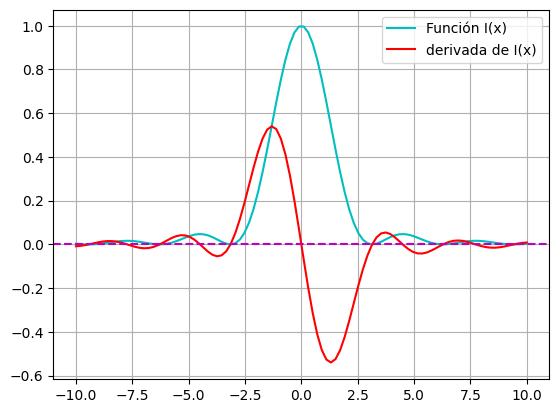

In [160]:
def I(x):              #Definimos la función, donde entra x, y nos devuelve la Intensidad
  i0=1
  return i0*(((np.sin(x))/x)**(2))

def dI(x):       #Analogo pero derivada
  i0=1
  return ((2*i0)/x)*(np.cos(x)-((np.sin(x))/x))*((np.sin(x))/x)

x=np.linspace(-10,10,100)
y1=[]
y2=[]

for i in x:
  y1.append(I(i))
  y2.append(dI(i))

plt.plot(x,y1,label=("Función I(x)"),color="c")
plt.plot(x,y2,label=("derivada de I(x)"),color="r")
plt.axhline(y=0,linestyle="--",color="m")
plt.legend()
plt.grid()

El valor x 1/2 es 1.3915573782515103


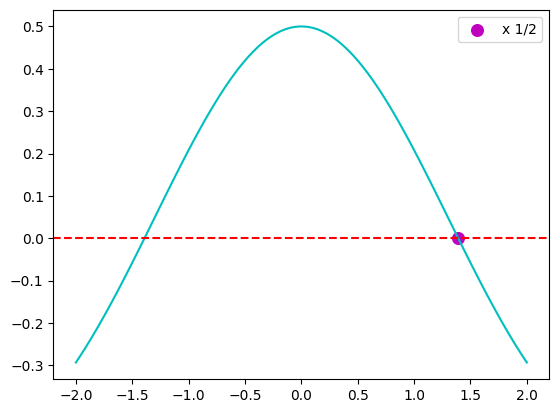

In [161]:
#Resolvamos entonces i(x)-i0/2 =0 #ya tenemos la función i(x), solo debemos alterarle el negativo!

def I_zero(x):              #Definimos la función, donde entra x, y nos devuelve la Intensidad
  i0=1
  return i0*(((np.sin(x))/x)**(2)) - (i0/2)

x=newton(I_zero,x0=(np.pi),x1=np.pi-1) #Y confirmemos que este valor sea correcto!

ejex=np.linspace(-2,2,100)
ejey=I_zero(ejex)

plt.plot(ejex,ejey,color="c")
plt.scatter(x,I_zero(x),s=70,color="m",label="x 1/2")
plt.axhline(0,linestyle="--",color="r")
plt.legend()
print(f"El valor x 1/2 es {x}")

In [162]:
#Finalmente, encontremos los màximos locales!
#a) Implementemos nuestra función regula falsi (con bella documentación huh?)

def rg(f,a,b,tol=1e-2,maxiter=1000):                  #Dejemos tol y maxiter predeterminado en este caso
  '''
  Permite encontrar las raices de una función.
  f: La función
  a: comienzo del intervalo a evaluar
  b: fin del intervalo a evaluar
  tol: tolerancia
  maxiter: máximas iteraciones
  '''
  '''
  if f(a)*f(b)>0:
    raise ValueError("f(a) y f(b) DEBEN tener signos opuestos") #No permite estas cosas!
  '''
  #Normalmente daria este error de arriba, pero como queremos revisar y mapear TODO, hagamos que, cuando no sea asi, no devuelva ningun elemento!
  if f(a)*f(b)>0:
    return 9999            #este numero representa un dato NO VALIDO, por lo cual, Luego los eliminaremos

  for i in range (maxiter):
    fa=f(a)
    fb=f(b)

    c=(((a*fb)-(b*fa))/(fb-fa))
    if abs(f(c))<tol:           #Devuelve en la tolerancia
      return c

    if f(c)*f(a)>0:
      a=c
      continue                   # En caso contrario, actualzia como mencioando
    if f(c)*f(b)>0:
      b=c
      continue
  '''
  return print(f"maximas iteraciones alcanzadas, el valor podría estar al rededor de {c}")  #Y si no alcanza las iteraciones, lo informa
  '''

  #Y si no llegase en las iteraciones, que lance un valor aproximado!
  return c

In [163]:
#Y ahora, encontremos todas las raices posibles!!! con un paso de 0.5... seamos practicos, para no repetir numeros, asi!
x0=np.arange(-10,10,0.5)
x1=np.arange(-9.5,10.5,0.5)  #De este modo, evitaremos repetición como se mostrarà a continuación

maxmin=[]       #Aca guardamos nuestros màximos y minimos.

for i in range(len(x0)):

  maxmin.append(rg(dI,x0[i],x1[i]))  #Coge uno de arriba(x0) y otro de abajo(x1), asi tenemos las parejas sin repetición

maxmin_0 = [x for x in maxmin if x != 9999]  #Le quitamos los "No validos"!!
maxminFinal= [x for x in maxmin_0 if not np.isnan(x)] #Le quitamos las posibles divisiones por cero (que generan nans)

<ipython-input-160-bb78a6f926fc>:7: RuntimeWarning: divide by zero encountered in scalar divide
  return ((2*i0)/x)*(np.cos(x)-((np.sin(x))/x))*((np.sin(x))/x)
<ipython-input-160-bb78a6f926fc>:7: RuntimeWarning: invalid value encountered in scalar divide
  return ((2*i0)/x)*(np.cos(x)-((np.sin(x))/x))*((np.sin(x))/x)


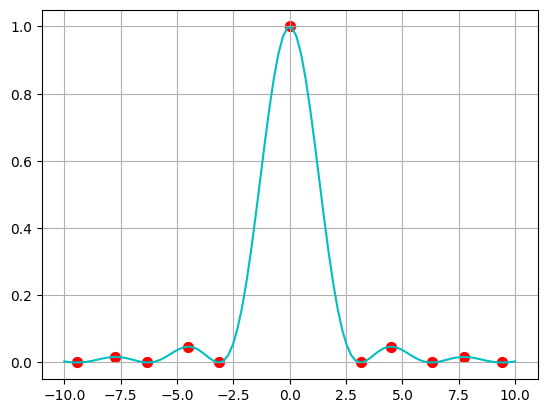

In [164]:
#Y listo!! confirmemos:
x=np.linspace(-10,10,100)
y=I(x)
plt.plot(x,y,color="c")

for i in maxminFinal:
  plt.scatter(i,I(i),color="r",s=50)

r=0.000001                                #Finalmente, debemos agregar este punto, que evaludado en I(x), seria division /0!
plt.scatter(r,I(r),color="r",s=50)                                #Por lo cual, lo aproximamos netamente
plt.grid()

In [165]:
#Notamos que los maximos y minimos estan intercalados, por lo cual...
#a) Agregar la aproximacion del 0
r=0.000001
maxminFinal.append(r)
maxminFinal.sort()

eliminar=[0,2,4,6,8,10]
for i in eliminar:
  maxminFinal[i]=9999

Maximos = [x for x in maxminFinal if x != 9999]
Maximos           #Y damas y caballeros, aqui tienen sus maximos!!!

[np.float64(-7.735162520742436),
 np.float64(-4.493030442276033),
 1e-06,
 np.float64(4.493030442276033),
 np.float64(7.735162520742436)]

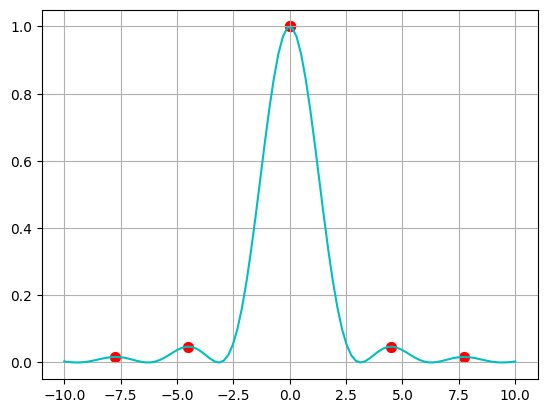

In [166]:
#Y listo! (veamoslo, no?)
x=np.linspace(-10,10,100)
y=I(x)
plt.plot(x,y,color="c")

for i in Maximos:
  plt.scatter(i,I(i),color="r",s=50)

r=0.000001                                #Finalmente, debemos agregar este punto, que evaludado en I(x), seria division /0!
plt.scatter(r,I(r),color="r",s=50)                                #(solo con fines gráficos, ya esta incluido en la lista Maximos)
plt.grid()

# 5

La ley de Planck describe la densidad espectral de energía de la radiación electromagnética emitida por un cuerpo negro en equilibrio térmico (Toda et al., 1998):

$$u(\lambda,T)=\frac{8\pi hc}{\lambda^{5}}\,\frac{1}{\exp\left(hc/\left(\lambda k_{B}T\right)\right)-1},$$

donde:
- $T$ = temperatura de equilibrio (K)
- $\lambda$ = longitud de onda (m)
- $h=6.626 \times 10^{-34}$ J $\cdot$ s (constante de Planck)
- $k_{B}=1.381 \times 10^{-23}$ J$\cdot$K$^{-1}$ (constante de Boltzmann)
- $c=2.998 \times 10^{8}$ m$\cdot$s$^{-1}$ (velocidad de la luz)

Introduciendo las variables adimensionales:
$$x=\frac{\lambda}{\lambda_{0}}, \quad \lambda_{0}=\frac{hc}{k_{B}T}, \quad K=\frac{8\pi k_{B}T}{\lambda_{0}^{4}},$$

la ley se simplifica a:
$$u(\lambda,T)=K\frac{1}{x^{5}\left(e^{1/x}-1\right)}.$$

La derivada (para encontrar máximos):
$$\frac{\partial u}{\partial\lambda}=K\lambda_{0}\frac{5x+(1-5x)e^{1/x}}{x^{7}(e^{1/x}-1)^{2}}. $$

- Graficar $u(\lambda,T)$ y $\partial u/\partial\lambda$ para $T=4000, 5000, 6000$ K.

- Resolver $\partial u/\partial\lambda=0$ para $T=5778$ K con el método de Bisección y de Newton.

- Validar la ley de desplazamiento de Wien: $\lambda_{\rm max}T \approx 2.898 \times 10^{-3}$ m $\cdot$ K

Text(0.5, 1.0, 'Función u')

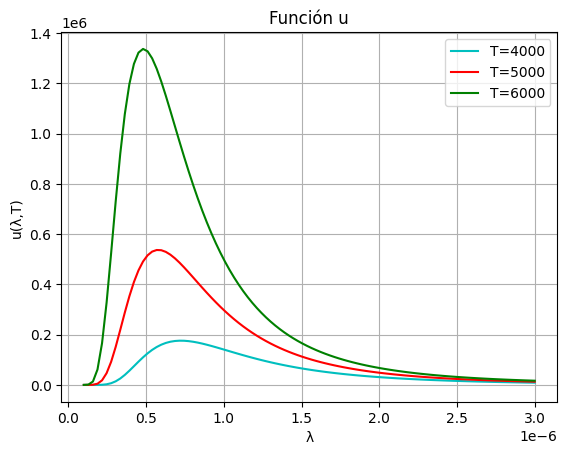

In [22]:
#la confusión continua
#Definamos
h=6.626*1e-34
kb=1.381*1e-23
c=2.998*1e8

l=np.linspace(1e-7,3e-6,100)  #Acà hacemos un linspace para graficar (LOS VALORES DEBEN SER MUY MUY PEQUEÑOS! SON nm!)
T1=4000
T2=5000                   #los T establecidos
T3=6000

def u(l,T):

  l0=((h*c)/(kb*T))
  x=(l/l0)                          #Introducimos las variables por definición
  K=(8*(np.pi)*kb*T)/(l0**4)

  return K*(1/ ((x**5)*(((np.e**(1/x)))-1))  )  #Y reemplazamos

y1=u(l,T1)
y2=u(l,T2)                              #Teniendo como cosntante, la T a elegir, y moviendonos en Lambda
y3=u(l,T3)

plt.plot(l,y1,color="c",label=(f"T={T1}"))
plt.plot(l,y2,color="r",label=(f"T={T2}")) #Y solo procede gráficar u(λ,T)
plt.plot(l,y3,color="g",label=(f"T={T3}"))
plt.ylabel("u(λ,T)")
plt.xlabel("λ")
plt.legend()
plt.grid()
plt.title("Función u")

Text(0.5, 1.0, 'Función ∂u/∂λ')

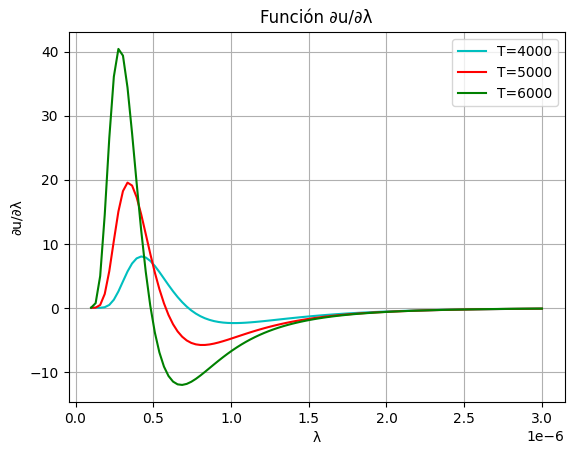

In [23]:
def dfu(l,T): #Ahora definimos la derivada
  l0=(h*c)/(kb*T)
  x=l/l0                          #Note que los parametros son los mismos
  K=(8*np.pi*kb*T)/(l0**4)
  return (K*l0)*(((5*x)+((1-(5*x))*np.exp(1/x)))/((x**7)*((np.exp(1/x)-1)**2)))

y1=dfu(l,T1)
y2=dfu(l,T2)                              #Teniendo como cosntante, la T a elegir, y moviendonos en Lambda
y3=dfu(l,T3)

plt.plot(l,y1,color="c",label=(f"T={T1}"))
plt.plot(l,y2,color="r",label=(f"T={T2}")) #Y solo procede gráficar ∂u/∂λ (es análogo)
plt.plot(l,y3,color="g",label=(f"T={T3}"))
plt.ylabel("∂u/∂λ")
plt.xlabel("λ")
plt.legend()
plt.grid()
plt.title("Función ∂u/∂λ")


Con Newton, nuestro λ es 5.02741998302787e-07
Con Bisección, nuestro λ es 5.01398868560791e-07


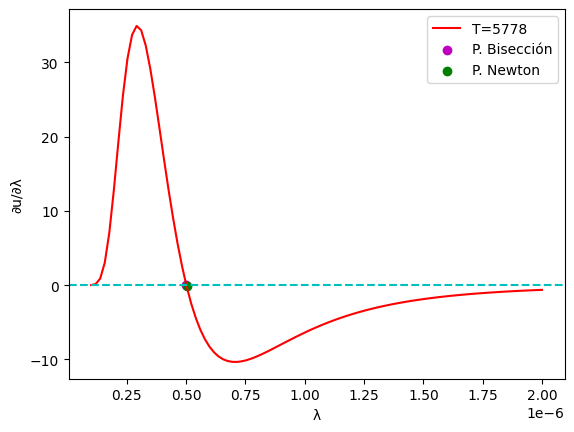

In [59]:
#Ahora, para resolver t=0, debemos hacer un breve cambio en la función.

def dfu_raiz(l): #Ahora necesitamos hallar el L que permite esta situación
  T=5778         #T es fijo en este caso
  l0=(h*c)/(kb*T)
  x=l/l0
  K=(8*np.pi*kb*T)/(l0**4)
  return (K*l0)*(((5*x)+((1-(5*x))*np.exp(1/x)))/((x**7)*((np.exp(1/x)-1)**2))) #Y todo permanece igual

l_newt=newton(dfu_raiz,x0=0.5*1e-6,x1=1*1e-6)
print(f"Con Newton, nuestro λ es {l_newt}")
l_bisec=bisect(dfu_raiz,0.01*1e-6,0.9*1e-6)        #El intervalo lo obtuvimos viendo la grafica anterior en aprx T=5000
print(f"Con Bisección, nuestro λ es {l_bisec}")

#Ahora veamoslo graficamente si atinaron!
T4=5778
l=np.linspace(1e-7,2e-6,100)
y4=dfu(l,T4)
plt.plot(l,y4,label=(f"T={T4}"),color="r")
plt.ylabel("∂u/∂λ")
plt.xlabel("λ")
plt.axhline(y=0,linestyle="--",color="c")

plt.scatter(l_bisec,dfu(l_bisec,T4),label="P. Bisección",color="m")
plt.scatter(l_newt,dfu(l_newt,T4),label="P. Newton",color="green")


plt.legend()

In [ ]:
#Finalmente, este nùmero que hallamos (la derivada =0), es precisamente un maximo de la función!, por lo cual;
T=5778           #T asociado a la gràfica
wien=l_bisec*T   # Màximo asociado con la derivada con respecto al T
print(f"{wien:.3e}") #Y como vemos, efectivamente se cumple! confirmemos otros valores más

2.897e-03


In [ ]:
def dfu_raiz4(l): #DERIVADA CON T EN 4000
  T=4000
  l0=(h*c)/(kb*T)
  x=l/l0
  K=(8*np.pi*kb*T)/(l0**4)
  return (K*l0)*(((5*x)+((1-(5*x))*np.exp(1/x)))/((x**7)*((np.exp(1/x)-1)**2)))

def dfu_raiz5(l): #DERIVADA CON T EN 5000
  T=5000
  l0=(h*c)/(kb*T)
  x=l/l0
  K=(8*np.pi*kb*T)/(l0**4)
  return (K*l0)*(((5*x)+((1-(5*x))*np.exp(1/x)))/((x**7)*((np.exp(1/x)-1)**2)))

def dfu_raiz6(l): #Y finalmente... DERIVADA CON T EN 6000
  T=6000
  l0=(h*c)/(kb*T)
  x=l/l0
  K=(8*np.pi*kb*T)/(l0**4)
  return (K*l0)*(((5*x)+((1-(5*x))*np.exp(1/x)))/((x**7)*((np.exp(1/x)-1)**2)))


l_4000=bisect(dfu_raiz4,0.1*1e-6,1*1e-6)
l_5000=bisect(dfu_raiz5,0.1*1e-6,1*1e-6)            #Los valores fueron elegidos observando las gràficas
l_6000=bisect(dfu_raiz6,0.1*1e-6,1*1e-6)

wien1=l_4000*4000
wien2=l_5000*5000                                #Definimos nuestra ecuación (lambda maximo * T asociado)
wien3=l_6000*6000

print(f"{wien1:.3e}")
print(f"{wien2:.3e}")            #Y como podemos osbervar, se cumple!!
print(f"{wien3:.3e}")

2.897e-03
2.897e-03
2.897e-03


# 6

Considere un pozo de potencial cuadrado de ancho $w$, con paredes de altura $V$:

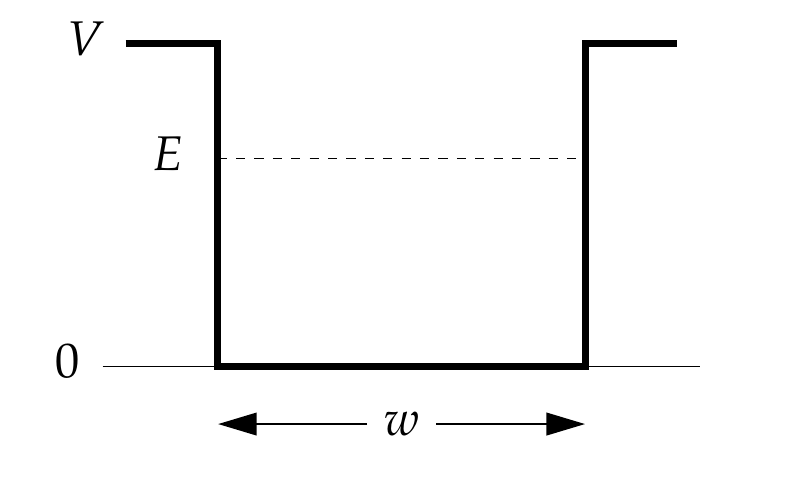

Usando la ecuación de Schrödinger, se puede demostrar que las energías permitidas $E$ de una partícula cuántica de masa $m$ atrapada en el pozo son soluciones de:

$$\tan \sqrt{w^2 m E / 2 \hbar^2} =
\begin{cases}
\sqrt{(V - E) / E} & \text{para los estados pares,} \\
-\sqrt{E / (V - E)} & \text{para los estados impares,}
\end{cases}$$

donde los estados se numeran comenzando desde 0, siendo el estado base el estado 0, el primer estado excitado el estado 1, y así sucesivamente.

- Para un electrón (masa $ 9.11 \times 10^{-31} \, \text{kg} $) en un pozo con $ V = 20 \, \text{eV} $ y $ w = 1 \, \text{nm} $, escriba un programa en Python para graficar las tres cantidades:

$$y_1 = \tan \sqrt{w^2 m E / 2 \hbar^2}, \quad y_2 = \sqrt{\frac{V - E}{E}}, \quad y_3 = -\sqrt{\frac{E}{V - E}},$$

en el mismo gráfico, como función de $ E $ desde $ E = 0 $ hasta $ E = 20 \, \text{eV} $. A partir de su gráfico, haga estimaciones aproximadas de las energías de los primeros seis niveles de energía de la partícula.

- Escriba un segundo programa para calcular los valores de los primeros seis niveles de energía en electrón-voltios con una precisión de $ 0.001 \, \text{eV} $ usando el método de la bisección.

(-10.0, 10.0)

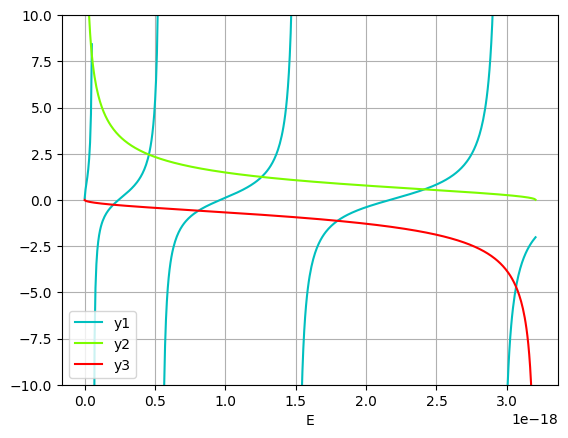

In [78]:
#Cuanta confusión! pero vamos por pasos, veamos que resulta...
#Primero lo primero... Definir!

hb=(6.626*1e-34)/(2*np.pi)                  #(eV/s), queremos todo en las mismas unidades!
m=9.11*1e-31
V=(20)*(1.602*1e-19)
w=1*1e-9

def y1(E):
  return np.tan(((w**2)*m*E*(1/(2*(hb**2))))**(1/2))
def y2(E):
  return (((V-E)/E)**(1/2))
def y3(E):
  return -(((E)/(V-E))**(1/2))

E=np.linspace(0.001,19.999,500)*(1.602*1e-19)  #Vamos de 1 a 19, para no econtrarnos con divisiones por cero!
y_1=y1(E)
y_1[:-1][np.diff(y_1) < 0] = np.nan #Con este codigo resolvemos el problema de las asintotas imaginarias de las tangentes!!
y_2=y2(E)
y_3=y3(E)

plt.plot(E,y_1,color="c",label=("y1"))
plt.plot(E,y_2,color="lawngreen",label=("y2"))
plt.plot(E,y_3,color="r",label=("y3"))
plt.xlabel("E")
plt.ylabel("")
plt.legend()
plt.grid()
plt.ylim(-10,10)

In [79]:
#Como podemos observar entoncess en la gráfica anterior, hallemos entonces las primeras seis intersecciónes.
#A ojo, podemos decir que estan aproximadamente en.. x=(0.1,0.4,0.7,1.25,1.75,2.4) (Aproximaciones de los 6 niveles!)


#Resolvamos entonces nùmericamente con una precision de 0.001 eV.
#a) Intersecciones de y1 con y2, y con y3!
def y1_y2(E):
  return np.tan(((w**2)*m*E*(1/(2*(hb**2))))**(1/2))-(((V-E)/E)**(1/2))          #Clasico f(x)=0

def y1_y3(E):
  return np.tan(((w**2)*m*E*(1/(2*(hb**2))))**(1/2))+(((E)/(V-E))**(1/2))           #Note que es +, pues la funcion era negativa.

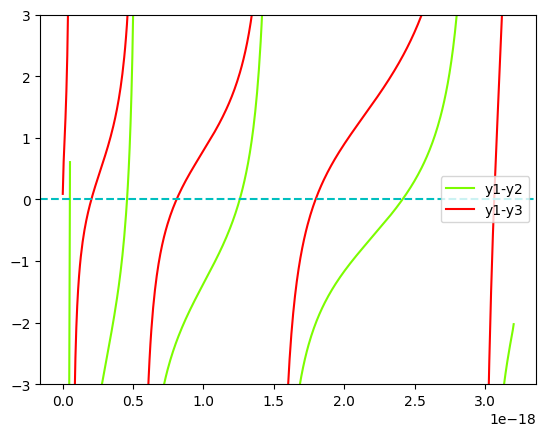

In [80]:
#Grafiquemos estas nuevas funciones para observar mejor los intervalos...!
E=np.linspace(0.001,19.999,500)*(1.602*1e-19)
y_1=y1_y2(E)
y_1[:-1][np.diff(y_1) < 0] = np.nan       #Asi desaparecemos las intersecciones fantasma!!
y_2=y1_y3(E)
y_2[:-1][np.diff(y_2) < 0] = np.nan

plt.plot(E,y_1,label="y1-y2",color="lawngreen")
plt.plot(E,y_2,label="y1-y3",color="red")
plt.axhline(y=0,color="c",linestyle="--")
plt.ylim(-3,3)
plt.legend()


In [154]:
#Perfceto!! ya que podemos visualizar los intervalos de intersección hagamos esto!

interseca=[]      #Aqui metemos nuestras intersecciones
intersecb=[]



#Hagamos esto manual... dado que la separación de posibles intervalos es algo ambigua
#Posibles raices y2 (lA GRAFICA VERDE)  (Intervalos a ojo)
x0=(0.4*1e-18,  1*1e-18,  2.41*1e-18)
x1=(0.499*1e-18,  1.49*1e-18,  2.42*1e-18)

for i in range(0,3):
  x00=x0[i]
  x11=x1[i]
  interseca.append(bisect(y1_y2, x00, x11, xtol=0.001))

#Posibles raices y3 (lA GRAFICA ROJA)  (Intervalos a ojo)
x0=(0.2*1e-18,  0.8*1e-18,  1.79*1e-18)
x1=(0.21*1e-18,  0.81*1e-18,  1.8*1e-18)

for i in range(0,3):
  x00=x0[i]
  x11=x1[i]
  intersecb.append(bisect(y1_y3, x00, x11, xtol=0.001))

#Por lo tanto, se presume que los valores que satisfacen la expresion serían;
Puntos=interseca+intersecb
Puntos.sort()
Puntos  #Voilà! Se pudo garantizar su perfecto comportamiento como se muesytra acontinuación:

[2.0500000000000002e-19,
 4.495e-19,
 8.050000000000001e-19,
 1.2450000000000001e-18,
 1.795e-18,
 2.4150000000000002e-18]

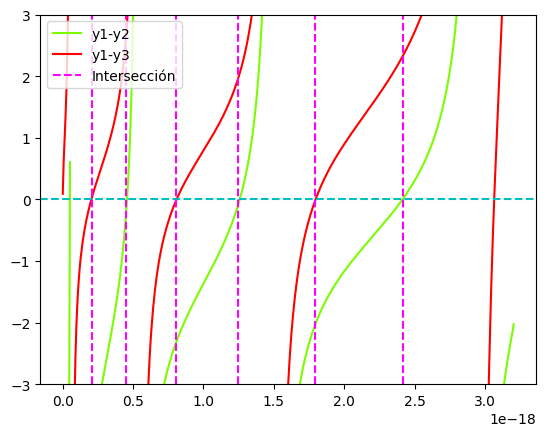

In [159]:

'''
Las aproximaciones iniciales, daban muy cercanas al punto, pero no precias; sin embargo, se opto por hacer los intervalos
lo mas cerrados posibles! es decir, casi el minimo de diferencia entre dos puntos para que cambiasen de signo.
Una vez se hizo este ajuste (note que es netamente visual, en base a la gráfica), se pudo garantizar una mayor precisión
de los valores que corresponden a la intersección!

Se sospecha que este comportamiento tan erratico en valores relativamente alejados a la raiz, se debe a los valores tan pequeños
en los que estamos trabajando! Note que estamos bailando con el Epsilon! pues nos movemos en vecindades de 1e-18!
Por lo cual, sospechamos que los redondeos y underflows son muy comunes en nuestros calculos, por lo cual, el estar lo mas cerca posible
de la raiz, garantiza un calculo mas preciso.

Finalmente, con estas cercanias, se pudieron obtener los mejores datos.
A continuación, se presenta una gráfica con los datos proporcionados, los cuales coinciden con las raices que buscamos
(Se usaron lineas verticales para evitar el scatter, pues tendriamos que separar los puntos asocaidos a cada funcion
sin embargo, el razonamiento es el mismo.)
'''

E=np.linspace(0.001,19.999,500)*(1.602*1e-19)
y_1=y1_y2(E)
y_1[:-1][np.diff(y_1) < 0] = np.nan
y_2=y1_y3(E)
y_2[:-1][np.diff(y_2) < 0] = np.nan

plt.plot(E,y_1,label="y1-y2",color="lawngreen")
plt.plot(E,y_2,label="y1-y3",color="red")
plt.axhline(y=0,color="c",linestyle="--")
plt.ylim(-3,3)

plt.axvline(Puntos[0],color="fuchsia",linestyle="--",label="Intersección")
plt.axvline(Puntos[1],color="fuchsia",linestyle="--")
plt.axvline(Puntos[2],color="fuchsia",linestyle="--")     #Grafica rapida (para no hacer scatter) con el proposito de visualizar las discrepancias
plt.axvline(Puntos[3],color="fuchsia",linestyle="--")
plt.axvline(Puntos[4],color="fuchsia",linestyle="--")
plt.axvline(Puntos[5],color="fuchsia",linestyle="--")
plt.legend()

In [157]:
#Eureka! hallamos los primeros seis niveles de energía, los cuales serían....
Puntos

[2.0500000000000002e-19,
 4.495e-19,
 8.050000000000001e-19,
 1.2450000000000001e-18,
 1.795e-18,
 2.4150000000000002e-18]

# 7

Existe un punto entre la Tierra y la Luna, llamado punto de Lagrange $L_1$, donde un satélite orbitará la Tierra en perfecta sincronía con la Luna, permaneciendo siempre entre ambas. Esto funciona porque la atracción hacia adentro de la Tierra y la atracción hacia afuera de la Luna se combinan para crear exactamente la fuerza centrípeta necesaria que mantiene al satélite en su órbita.

Asumiendo órbitas circulares y que la Tierra es mucho más masiva que la Luna o el satélite, la distancia $r$ desde el centro de la Tierra hasta el punto $L_1$ satisface:

$$\frac{GM}{r^2} - \frac{Gm}{(R-r)^2} = \omega^2 r,$$

donde $M$ y $m$ son las masas de la Tierra y la Luna respectivamente, $G$ es la constante gravitacional de Newton y $ \omega $ es la velocidad angular tanto de la Luna como del satélite.

- La ecuación anterior es una ecuación polinómica de quinto grado en $r$ (también llamada ecuación quíntica). Este tipo de ecuaciones no puede resolverse exactamente en forma cerrada, pero es sencillo resolverlas numéricamente. Escriba un programa que use el método de Newton o el método de la secante para resolver la distancia $r$ desde la Tierra hasta el punto $L_1$.

Los valores de los diversos parámetros son:

$$G = 6.674 \times 10^{-11} \, \text{m}^3 \text{kg}^{-1} \text{s}^{-2},$$

$$M = 5.974 \times 10^{24} \, \text{kg},$$

$$m = 7.348 \times 10^{22} \, \text{kg},$$

$$R = 3.844 \times 10^8 \, \text{m},$$

$$\omega = 2.662 \times 10^{-6} \, \text{s}^{-1}.$$

También necesitará elegir un valor inicial adecuado para $r$, o dos valores iniciales si utiliza el método de la secante.

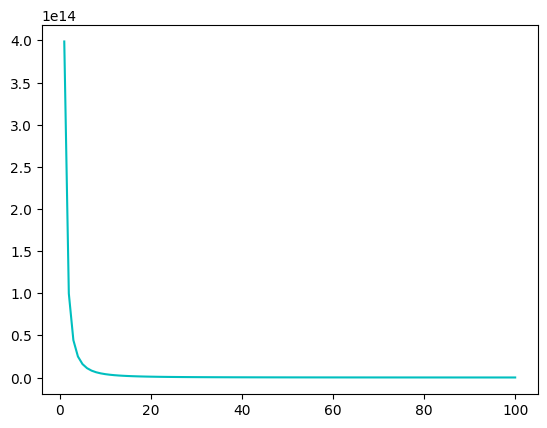

In [52]:
#Definamos;
G=6.674*1e-11
M=5.974*1e24
m=7.348*1e22       #Note que todo esta en unidades S.I. por lo tanto, no habrán problemas
R=3.844*1e8
w=2.662*1e-6

#Definamos el clásico f(x)=0

def l1_raiz(r):
  return ((G*M)/(r**(2)))-((G*m)/((R-r)**(2)))-((w**2)*r)

#Ahora... como elegimos un r conveniente? Veamos el comportamiento en una gràfica!
x_r=np.linspace(1,100,100)
y=l1_raiz(x_r)
plt.plot(x_r,y,color="c") #Vaya, podemos observar que pareciese asintotica!

#Por lo cual, lo mas inteligente será usar valores de x0, x1 MUY GRANDES, y asi poder hacer una aproximación mas correcta

In [ ]:
#Por lo cual:
r=newton(l1_raiz,x0=30000,x1=30001)     #Valores muy muy grandes para posibles r cerca de el 0
r=r*(1/1000) #Y dado que seràn valores grandes, porque no ponerlo en km?
print(f"La distancia r, del centro de la tierra a L1 es {round(r,3)} km")

La distancia r, del centro de la tierra a L1 es 326045.072 km
